# 🧵 From Pixels to Predictions: A Fashion-MNIST Journey

Welcome to this exciting exploration of **Fashion-MNIST**! 🧠👗 In this notebook, we’ll take you through the process of building a machine learning model that can classify fashion items with style. Here's what you can expect:

---

### 🚀 **What You’ll Experience in This Notebook:**

1. **📂 Data Preparation**: Load the dataset, split it into training, validation, and test sets, and preprocess it for training.
2. **🖼️ Visual Exploration**: Take a closer look at some sample images from the dataset.
3. **🎨 Data Augmentation**: Enhance training data with techniques like rotation, shifting, and zooming.
4. **🏗️ Model Building**: Create a **Convolutional Neural Network (CNN)** for image classification.
5. **📈 Training & Evaluation**: Train the model, visualize its performance, and analyze the results.
6. **📊 Confusion Matrix & Metrics**: Dive into the detailed evaluation of the model’s predictions.
7. **😂 A Dash of Fun**: Enjoy some lighthearted humor and engage with the world of fashion and AI.

---

### 💡 **Why Should You Care?**
- **Learn CNNs**: Get hands-on experience with one of the most powerful tools in deep learning.
- **Tackle Real-World Data**: Fashion-MNIST is a practical, real-world dataset that simulates challenges in image classification.
- **Have Fun While Learning**: Because coding isn’t just about work—it’s about creativity and discovery. 🌟

---

Ready to combine **tech** and **style**? Let’s get started! 👠🛠️  


In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import random

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

import warnings
warnings.filterwarnings('ignore') 

<div style="border: 3px solid #2196F3; padding: 20px; border-radius: 10px; background-color: #e3f2fd; text-align: center; font-family: Arial, sans-serif;">
    <h2 style="color: #0d47a1; font-weight: bold; margin-bottom: 15px;">🌐🌟 Explore the <b>CNN Visualization Tool</b> 🌟🌐</h2>
    <p style="font-size: 16px; line-height: 1.8; color: #222;">
        The <b>CNN model</b> demonstrated in this notebook is inspired by the fantastic 🌟 
        <b>CNN Explainer</b> tool! 🧠✨  
        This tool provides an <b>interactive visualization</b> of CNN layers, making it easy to understand how convolutional neural networks work! 🖼️🤖  
        <br><br>
        I’ve designed the model in this notebook to align with concepts showcased in the tool.  
        Click the button below to dive into the world of CNNs and enhance your understanding! 🚀🌌  
    </p>
    <a href="https://poloclub.github.io/cnn-explainer/" 
       target="_blank" 
       style="font-size: 18px; color: white; background-color: #0d47a1; text-decoration: none; padding: 12px 25px; border-radius: 8px; display: inline-block; margin-top: 15px; font-weight: bold;">
        👉✨ Explore <b>CNN Explainer</b> 🚀👈
    </a>
    <p style="margin-top: 15px; font-size: 14px; color: #555;">
        (A must-visit resource for anyone curious about the workings of convolutional neural networks! 🌟📚)  
    </p>
</div>


## 🎲 Setting a Seed for Reproducibility

To ensure consistent results every time we run the notebook, we set a **random seed**. This helps make our experiments deterministic, allowing others to reproduce the same results.

Here’s what the `set_seed` function does:
- Sets the seed for **TensorFlow**.
- Sets the seed for **NumPy**.
- Sets the seed for Python’s built-in **random** module.

### 📂 Loading the Fashion-MNIST Dataset

The **Fashion-MNIST dataset** is loaded using TensorFlow's built-in `fashion_mnist.load_data()` method. This dataset contains:
- **60,000 training images** and **10,000 testing images** of grayscale fashion items.
- Each image is **28x28 pixels** and belongs to one of **10 categories**, like shirts, dresses, or sneakers.



In [2]:
def set_seed(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

set_seed()

data = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 🧪 Data Augmentation and Preprocessing

To prepare our dataset for training and evaluation, we leverage **data augmentation** for the training set and simple normalization for the validation and test sets. Here's a detailed breakdown of this process:

### 🔑 Key Steps and Techniques:

1. **Normalization**:
   - All pixel values are scaled to the range `[0, 1]` using `rescale=1./255`. This ensures the input values are consistent and suitable for neural networks.

2. **Data Augmentation (Training Data Only)**:
   - To improve the model's ability to generalize and prevent overfitting, we apply augmentation techniques:
     - **Rotation**: Randomly rotates images up to 10 degrees.
     - **Shifting**: Allows horizontal and vertical shifts of up to 10% of the image size.
     - **Zooming**: Applies random zooming up to 10%.

3. **No Augmentation for Validation and Test Sets**:
   - Validation and test data are strictly rescaled without augmentation to maintain their original structure for fair evaluation.

### 🤔 Why Didn't We Shuffle?
- **Shuffling was already done earlier** during the `train_test_split` step, ensuring a randomized distribution of training data. 
- For this step, we keep `shuffle=False` in the generators to maintain consistency between augmented batches and their corresponding labels. This is particularly useful when debugging or visualizing samples.

### ⚙️ Final Workflow:
- **Train Generator**: Augmentation + Rescaling
- **Validation Generator**: Rescaling only
- **Test Generator**: Rescaling only

By incorporating augmentation, we introduce variability into the training process without altering the test and validation datasets, ensuring a reliable and robust evaluation. 🚀✨


In [3]:
(train_val_data, train_val_label), (test_data, test_label) = data


train_data, valid_data, train_label, valid_label = train_test_split(train_val_data, 
                                                                    train_val_label, 
                                                                    random_state=42,
                                                                    test_size=0.1, 
                                                                    stratify=train_val_label)
print(train_data.shape, train_label.shape)
print(valid_data.shape, valid_label.shape)
print(test_data.shape, test_data.shape)

train_data = train_data[..., np.newaxis]
valid_data = valid_data[..., np.newaxis]
test_data = test_data[..., np.newaxis]

print(train_data.shape, train_label.shape)
print(valid_data.shape, valid_label.shape)
print(test_data.shape, test_data.shape)

(54000, 28, 28) (54000,)
(6000, 28, 28) (6000,)
(10000, 28, 28) (10000, 28, 28)
(54000, 28, 28, 1) (54000,)
(6000, 28, 28, 1) (6000,)
(10000, 28, 28, 1) (10000, 28, 28, 1)


## 🖼️ Exploring the Fashion-MNIST Dataset

To get a better understanding of the dataset, we randomly visualize **8 sample images** from the training set alongside their labels. This allows us to verify that the dataset is correctly loaded and ready for preprocessing.

### 🔑 Highlights:
- The dataset contains **10 distinct fashion categories**, such as `T-shirt/top`, `Trouser`, and `Ankle boot`.
- Images are **28x28 grayscale**, making them computationally efficient for deep learning models.
- Labels are mapped to their corresponding class names for easier interpretation.

### ⚙️ What’s Happening:
- We randomly select images from the dataset.
- Each image is displayed with its **category label**.
- Axes are hidden for a cleaner visualization.

This step ensures the dataset is visually consistent and ready for further analysis. 🚀👕👢


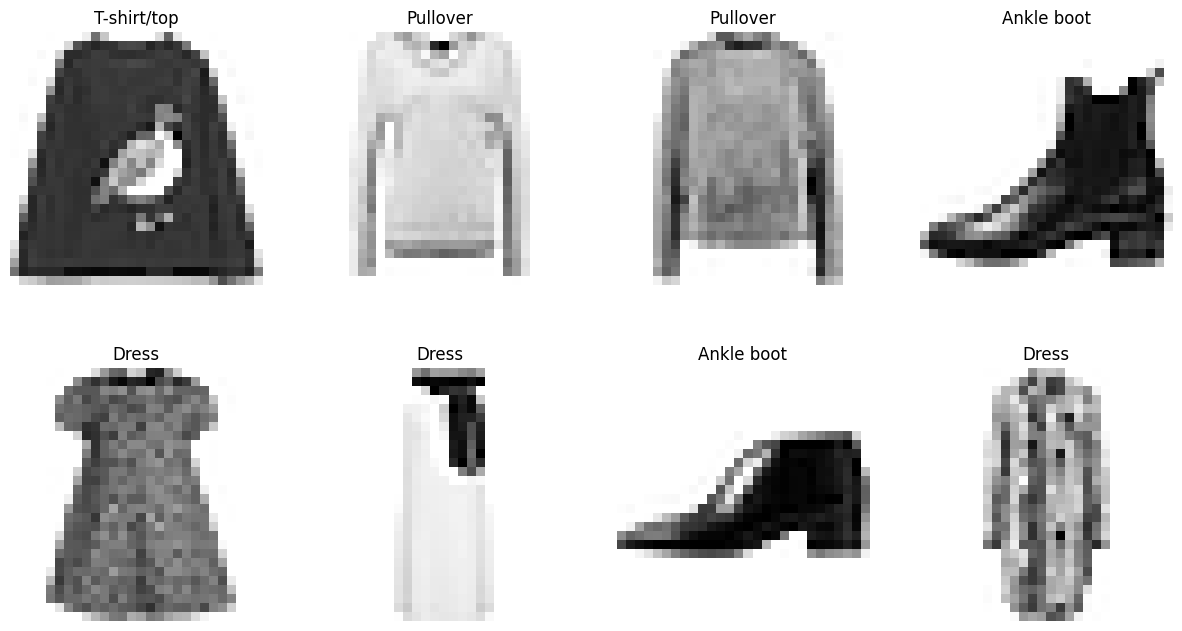

In [4]:
label_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
seq = range(len(train_data))
plt.figure(figsize=(15, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    index = random.choice(seq)
    plt.imshow(train_data[index], cmap=plt.cm.binary)
    plt.title(str(label_name[train_label[index]]))
    plt.axis(False)

## 🧪 Data Augmentation and Preprocessing

To prepare our dataset for training and evaluation, we leverage **data augmentation** for the training set and simple normalization for the validation and test sets. Here's a detailed breakdown of this process:

### 🔑 Key Steps and Techniques:

1. **Normalization**:
   - All pixel values are scaled to the range `[0, 1]` using `rescale=1./255`. This ensures the input values are consistent and suitable for neural networks.

2. **Data Augmentation (Training Data Only)**:
   - To improve the model's ability to generalize and prevent overfitting, we apply augmentation techniques:
     - **Rotation**: Randomly rotates images up to 10 degrees.
     - **Shifting**: Allows horizontal and vertical shifts of up to 10% of the image size.
     - **Zooming**: Applies random zooming up to 10%.

3. **No Augmentation for Validation and Test Sets**:
   - Validation and test data are strictly rescaled without augmentation to maintain their original structure for fair evaluation.

### 🤔 Why Didn't We Shuffle?
- **Shuffling was already done earlier** during the `train_test_split` step, ensuring a randomized distribution of training data. 
- For this step, we keep `shuffle=False` in the generators to maintain consistency between augmented batches and their corresponding labels. This is particularly useful when debugging or visualizing samples.

### ⚙️ Final Workflow:
- **Train Generator**: Augmentation + Rescaling
- **Validation Generator**: Rescaling only
- **Test Generator**: Rescaling only

By incorporating augmentation, we introduce variability into the training process without altering the test and validation datasets, ensuring a reliable and robust evaluation. 🚀✨


In [5]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,       # Randomly rotate images by 10 degrees
    width_shift_range=0.1,   # Randomly shift images horizontally by 10% of width
    height_shift_range=0.1,  # Randomly shift images vertically by 10% of height
    zoom_range=0.1,           # Randomly zoom images
)

valid_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)


train = train_gen.flow(train_data, train_label,
                       batch_size=32,
                       seed=42, shuffle=False)

validation = valid_gen.flow(valid_data, valid_label,
                       seed=42, shuffle=False)
test = test_gen.flow(test_data, test_label, seed=42, shuffle=False)

## 🏗️ Building and Training the First CNN Model

Let’s dive into constructing and training our **first Convolutional Neural Network (CNN)** for classifying the Fashion-MNIST dataset. Here’s a step-by-step breakdown: 🧵

---

### 🧱 **Model Architecture**:
Our CNN model consists of the following layers:
1. **Input Layer** 🖼️: Accepts grayscale images of shape `(28, 28, 1)`.
2. **Convolutional Layers** 🌀:
   - 4 convolutional layers with **10 filters** and kernel size `(3, 3)`, each followed by the **ReLU activation function**.
   - Convolutional layers extract spatial features from the input images.
3. **Max-Pooling Layers** 🏊:
   - 2 pooling layers with a pooling size of `(2, 2)` to downsample feature maps and reduce computation.
4. **Flatten Layer** 📄:
   - Flattens the feature maps into a 1D array to feed into the dense layer.
5. **Dense Output Layer** 🎯:
   - A fully connected layer with **10 units** (one for each class) and **softmax activation** for probability predictions.

---

### ⚙️ **Compilation Details**:
- **Optimizer**: `RMSprop` 🛠️ for efficient gradient updates.
- **Loss Function**: `SparseCategoricalCrossentropy` 📉 to handle class labels directly.
- **Metrics**: `SparseCategoricalAccuracy` 📊 to track performance during training.

---

### 🛑 **Early Stopping Callback**:
We use **Early Stopping** to prevent overfitting and save computation time:
- **Monitored Metric**: `val_loss` 🧮 (validation loss).
- **Patience**: Stops training after 3 consecutive epochs with no improvement.
- **Restore Best Weights**: Ensures the model reverts to the best-performing state. ✅

---

### 🔄 **Training the Model**:
We train the model for up to **20 epochs** (with early stopping enabled) using:
- **Training Data**: Augmented batches from the `train` generator.
- **Validation Data**: Batches from the `validation` generator.

---

This simple yet effective architecture is a great starting point for tackling image classification tasks! 🚀👗👜
```

In [6]:
set_seed()

model_1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(28, 28, 1), name='input'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation=tf.keras.activations.relu, name='conv_1'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation=tf.keras.activations.relu, name='conv_2'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='max_pool_1'),

    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation=tf.keras.activations.relu, name='conv_3'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation=tf.keras.activations.relu, name='conv_4'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='max_pool_2'),

    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(units=10, name='dense', activation=tf.keras.activations.softmax)    
], name='model_1')

model_1.compile(optimizer=tf.keras.optimizers.RMSprop(),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy])

early_stopping  = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=3,
                                                   restore_best_weights=True,verbose=1,)


model_1.summary()
history_1 = model_1.fit(train, validation_data=validation, epochs=20, verbose=1,
                       callbacks=[early_stopping])


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_1 (MaxPooling2D)       │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3 (Conv2D)                 │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_4 (Conv2D)                 │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_2 (MaxPooling2D)       │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


I0000 00:00:1732288574.311510      68 service.cc:145] XLA service 0x7aa20c00b2b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732288574.311566      68 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732288574.311570      68 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  17/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 2.2646 - sparse_categorical_accuracy: 0.1730

I0000 00:00:1732288576.466385      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 1.0580 - sparse_categorical_accuracy: 0.6183 - val_loss: 0.5571 - val_sparse_categorical_accuracy: 0.7817
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.6446 - sparse_categorical_accuracy: 0.7599 - val_loss: 0.5328 - val_sparse_categorical_accuracy: 0.7885
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.5787 - sparse_categorical_accuracy: 0.7836 - val_loss: 0.4691 - val_sparse_categorical_accuracy: 0.8262
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.5533 - sparse_categorical_accuracy: 0.7955 - val_loss: 0.4409 - val_sparse_categorical_accuracy: 0.8243
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.5270 - sparse_categorical_accuracy: 0.8019 - val_loss: 0.4077 - val_sparse_categorical_accuracy: 0.8488
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.5122 - sparse_categorical_accuracy: 0.8087 - val_loss: 0.3839 - val_sparse_categorical_accuracy

In [7]:
model_1.evaluate(test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3494 - sparse_categorical_accuracy: 0.8797


[0.3544072210788727, 0.8761000037193298]

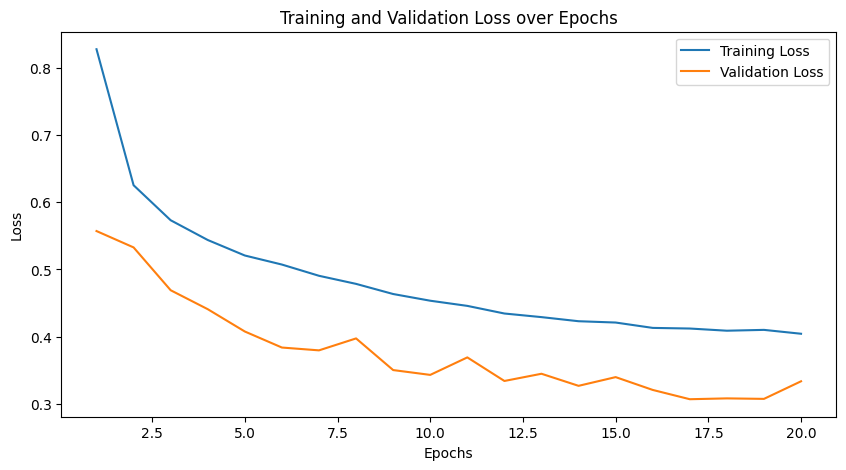

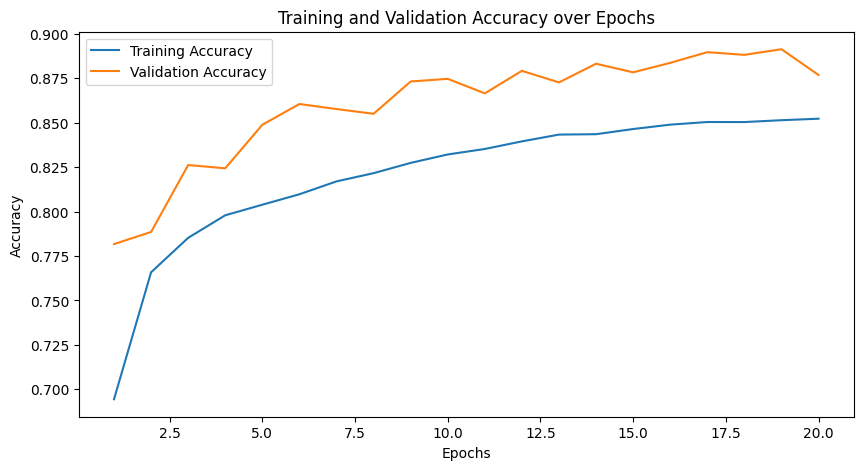

In [8]:

epochs = range(1, len(history_1.history["loss"]) + 1)
train_loss = history_1.history["loss"]
val_loss = history_1.history["val_loss"]
train_accuracy = history_1.history["sparse_categorical_accuracy"]
val_accuracy = history_1.history["val_sparse_categorical_accuracy"]

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

### 📈 Visualizing Model Performance

To evaluate the training process, we plot the **loss** and **accuracy** for both the training and validation sets over the epochs:

- **Loss Plot**: Shows how the training and validation loss decreased over time, indicating how well the model fit the data.
- **Accuracy Plot**: Tracks the improvement in training and validation accuracy, reflecting the model’s ability to correctly classify images.

The graphs give a clear picture of the model's learning behavior and help detect overfitting or underfitting`markdown
### Key Observations:
- Training and validation loss should converge over epochs.
- A gap between training and validation accuracy may indicate overting. 🚨
```

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


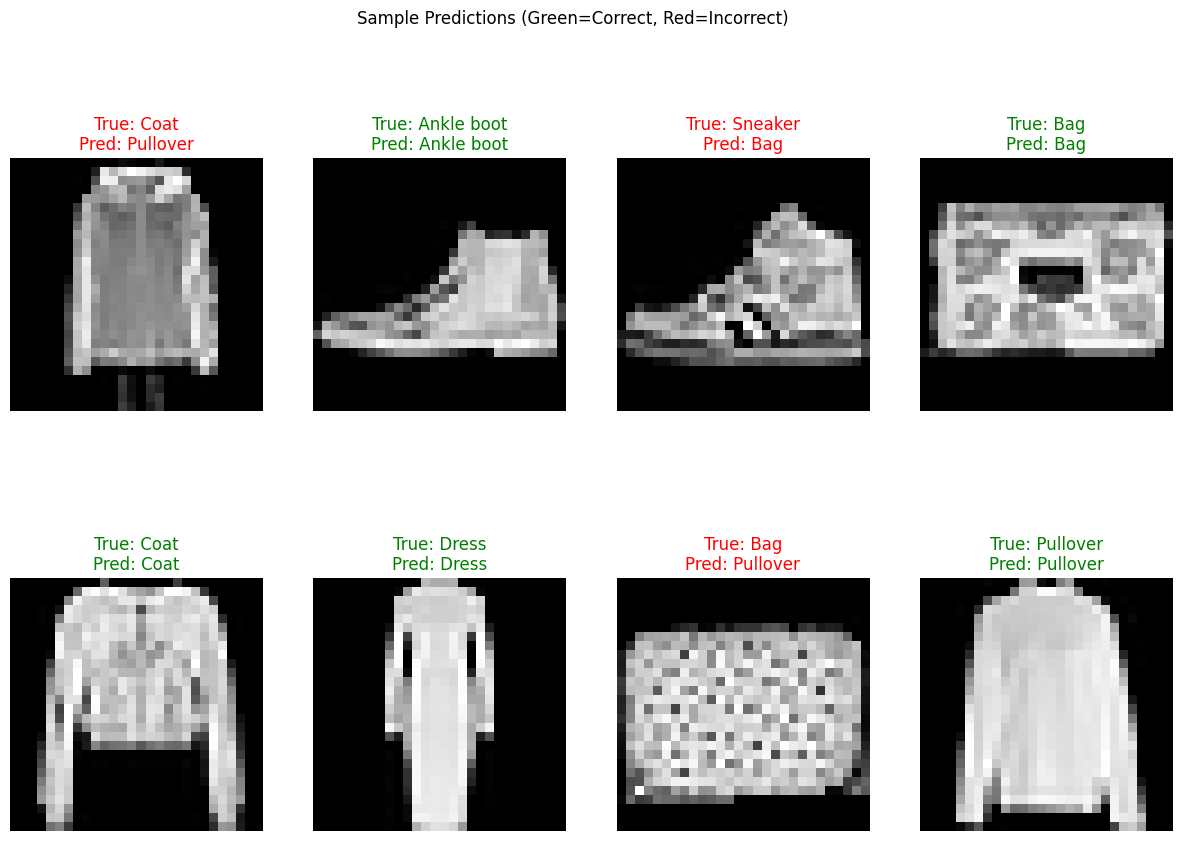

In [9]:


predictions = model_1.predict(test_data)  # Get predictions
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to label indices
true_labels = test_label

# Select a subset of images for visualization
subset_indices = np.random.choice(len(test_data), 8, replace=False)
subset_images = test_data[subset_indices]
subset_predictions = predicted_labels[subset_indices]
subset_true_labels = true_labels[subset_indices]

# Plot the subset of images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(subset_indices):
    plt.subplot(2, 4, i + 1)
    plt.imshow(subset_images[i], cmap="gray")
    plt.axis('off')
    color = "green" if subset_predictions[i] == subset_true_labels[i] else "red"
    plt.title(f"True: {label_name[subset_true_labels[i]]}\nPred: {label_name[subset_predictions[i]]}", color=color)

plt.suptitle("Sample Predictions (Green=Correct, Red=Incorrect)")
plt.show()


### 📊 Model Evaluation: Confusion Matrix and Classification Report


### 📝 Key Observations:
- The model performs well on categories like **Trouser**, **Sandal**, and **Ankle boot** with minimal misclassification.
- Performance is weaker on the **Shirt** class, which is often confused with similar categories like **Coat** and **T-shirt/top**.

---

### 📈 **Classification Report**:
The report summarizes key metrics for each class:
- **Precision**: Proportion of correct positive predictions (low for `Shirt` at **0.65**).
- **Recall**: Ability to capture all true instances of a class (e.g., **0.47** for `Shirt` indicates many were missed).
- **F1-Score**: Harmonic mean of precision and recall. The overall F1-score is **0.86**.

---



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


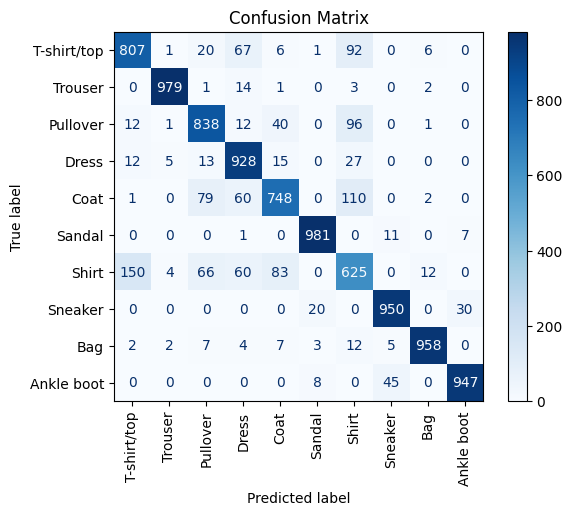

In [10]:
predictions = model_1.predict(test) 
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test.y

conf_matrix = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=label_name)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()


In [11]:
class_report = classification_report(true_labels, predicted_labels, target_names = label_name)
print("Classification Report:\n")
print(class_report)

Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.81      0.81      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.82      0.84      0.83      1000
       Dress       0.81      0.93      0.86      1000
        Coat       0.83      0.75      0.79      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.65      0.62      0.64      1000
     Sneaker       0.94      0.95      0.94      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### 🏁 **Conclusion**:
1. **Overall Accuracy**: The model achieves an accuracy of **86%**, indicating solid performance.
2. **Strengths**:
   - Excellent classification for distinct items like `Trouser`, `Ankle boot`, and `Bag`.
3. **Weaknesses**:
   - Struggles with visually similar categories, such as `Shirt`, `T-shirt/top`, and `Coat`.

🔮 **Next Steps**:
- Apply advanced techniques like:
  - **Data augmentation** to further improve generalization.
  - **Class balancing** for underperforming categories (e.g., `Shirt`).
- Experiment with deeper architectures or transfer learning for better feature extraction. 🚀👗
```

### 👗 **Fashion Meets AI!**

Who knew a neural network could have such an eye for fashion? 🧠✨ While it’s not ready to walk the runway just yet, our model sure knows its T-shirts from its sneakers. Well… most of the time. 😉 

Apparently, **Shirts** are still a mystery in the world of AI – but hey, even humans mix up a shirt and a coat sometimes, right? 🧥👕

---

### 💌 **If You Loved This Notebook…**

If you think our model deserves a spot in the AI Hall of Fashion Fame, show it some love by **upvoting**! 👍 Your support helps improve and showcase this work to more curious minds like ionMeetsTech  
```